In [1]:
import numpy as np
import cv2 # OpenCV biblioteka
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = 16,12

In [31]:
img = cv2.imread('4169455.png') # ucitavanje slike sa diska
plt.imshow(img)  # prikazivanje slike

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

img = img_rgb

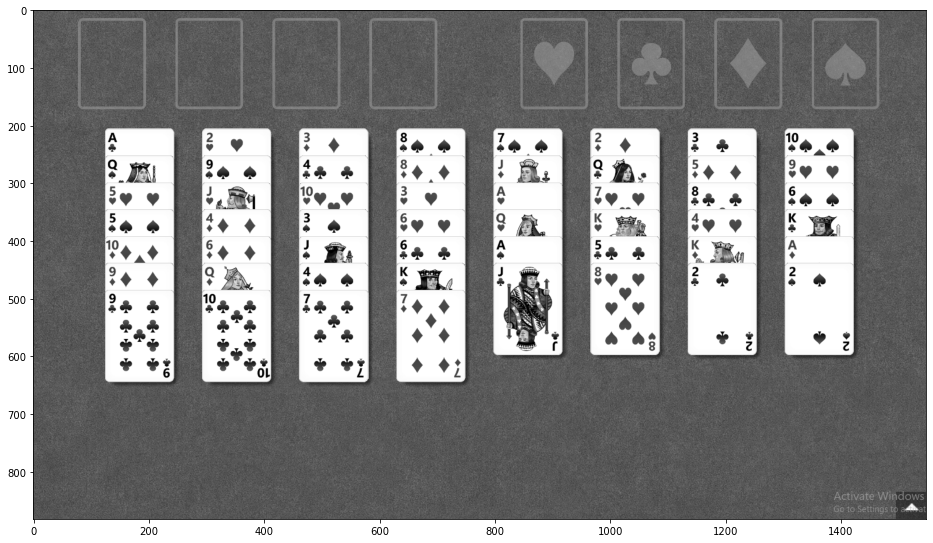

In [32]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

plt.imshow(img_gray, 'gray')  


Adaptivni treshold: 100.0


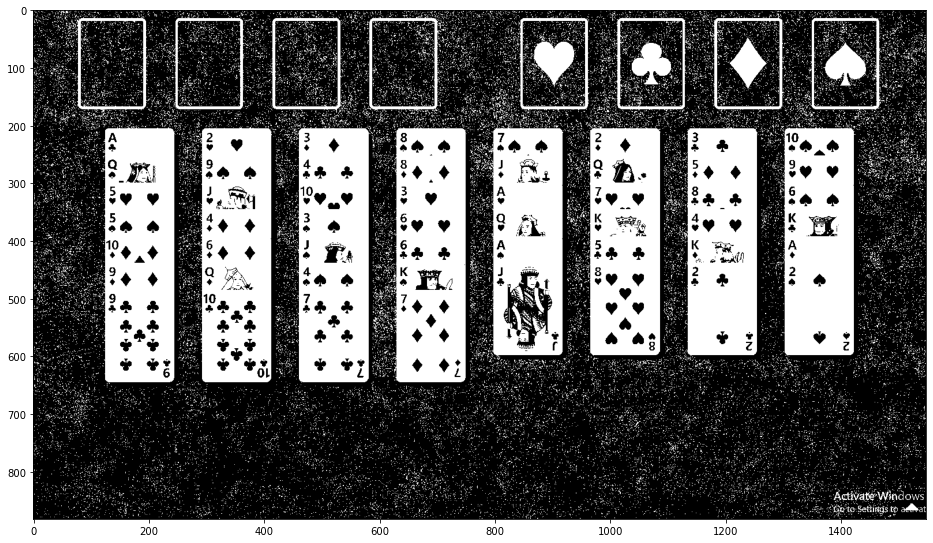

In [39]:
#ako budu koriscena polja na vrhu
ret, image_treshold = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY)
print("Adaptivni treshold: " + str(ret))
plt.imshow(image_treshold, 'gray')

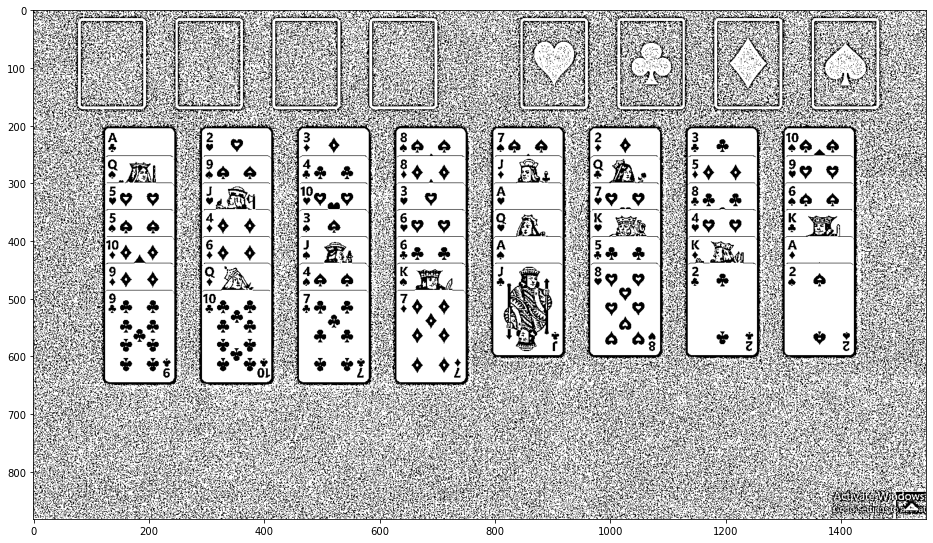

In [40]:
# adaptivni threshold gde se prag racuna = tezinska suma okolnih piksela, gde su tezine iz gausove raspodele
image_ad_treshold = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 5)
plt.figure()
plt.imshow(image_ad_treshold, 'gray')

Otsu's threshold: 169.0


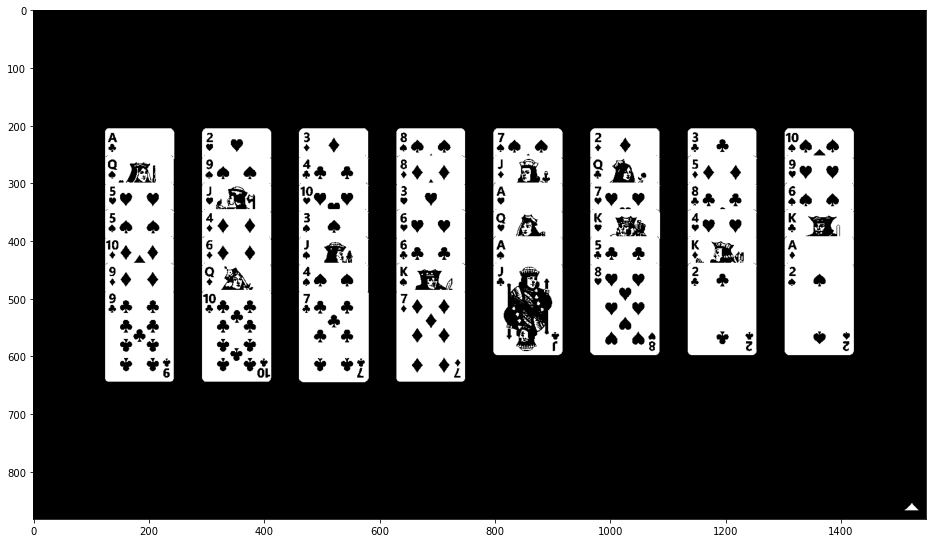

In [41]:
#ako polja na vrhu ne budu koriscena
ret, image_otsu = cv2.threshold(img_gray, 0, 255, cv2.THRESH_OTSU) # ret je izracunata vrednost praga, image_bin je binarna slika
print("Otsu's threshold: " + str(ret))
plt.imshow(image_otsu, 'gray')

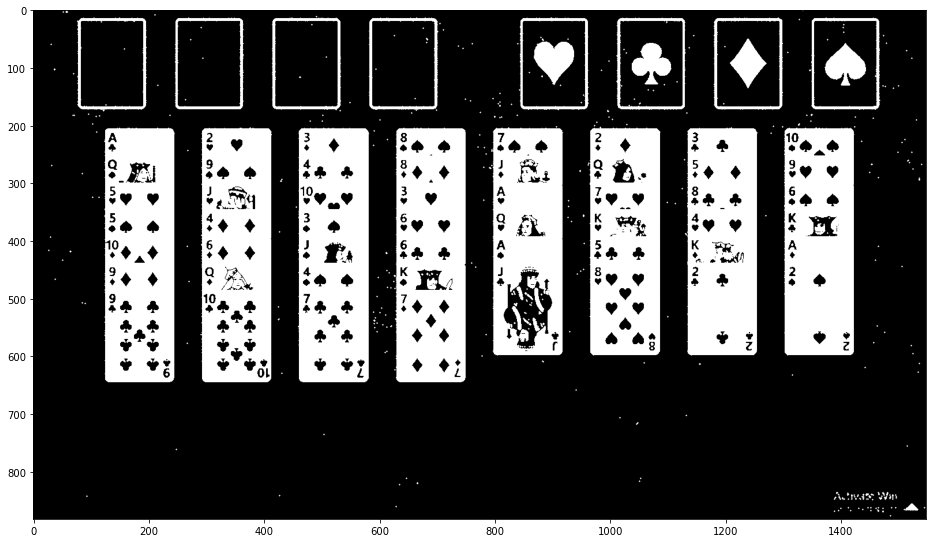

In [54]:
#otvaranje (za treshold)

opening = cv2.morphologyEx(image_treshold, cv2.MORPH_OPEN, kernel)
plt.imshow(opening, 'gray')

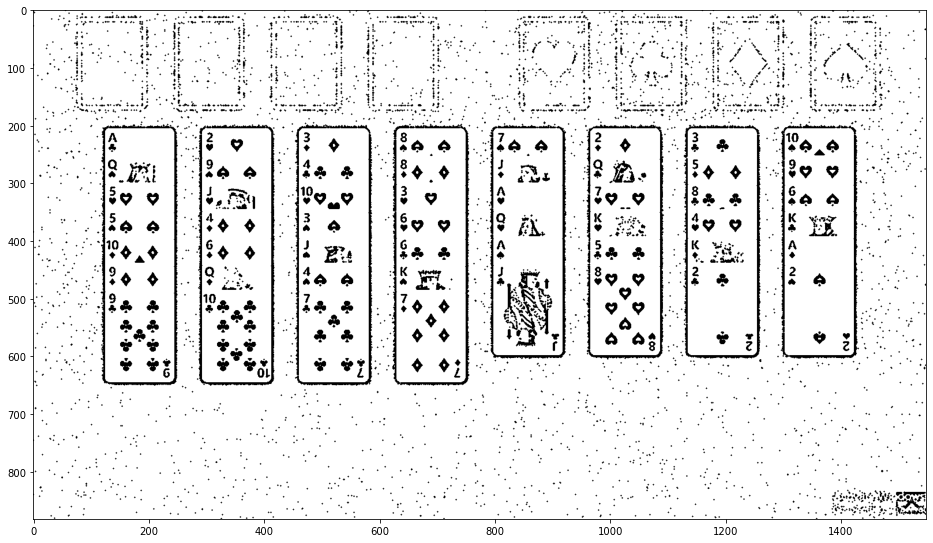

In [57]:
#zatvaranje (za adaptivni treshold)

closing = cv2.morphologyEx(image_ad_treshold, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing, 'gray')


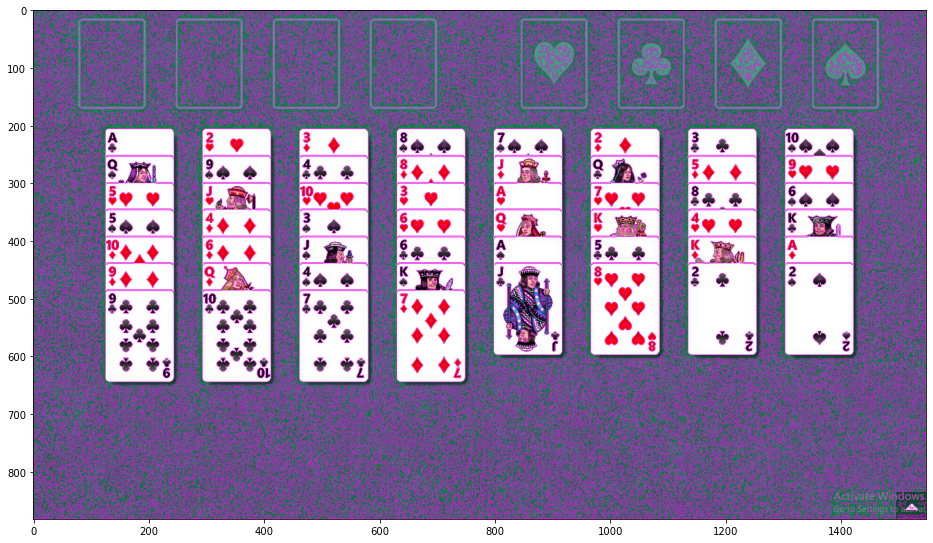

In [74]:
#konture za treshold  (oba korektna)
contours, hierarchy = cv2.findContours(opening, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

img = img_rgb.copy()
cv2.drawContours(img, contours, -1, (255, 0, 255), 1)
plt.imshow(img)



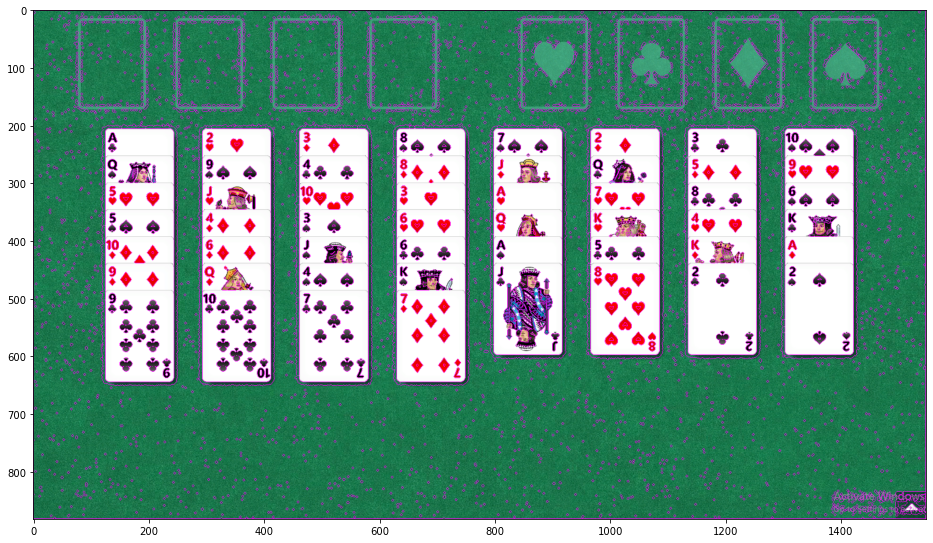

In [72]:
#konture za adativni treshold  (closing lose, samo ad_treshold okej)

contours, hierarchy = cv2.findContours(closing, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

img = img_rgb.copy()
cv2.drawContours(img, contours, -1, (255, 0, 255), 1)
plt.imshow(img)


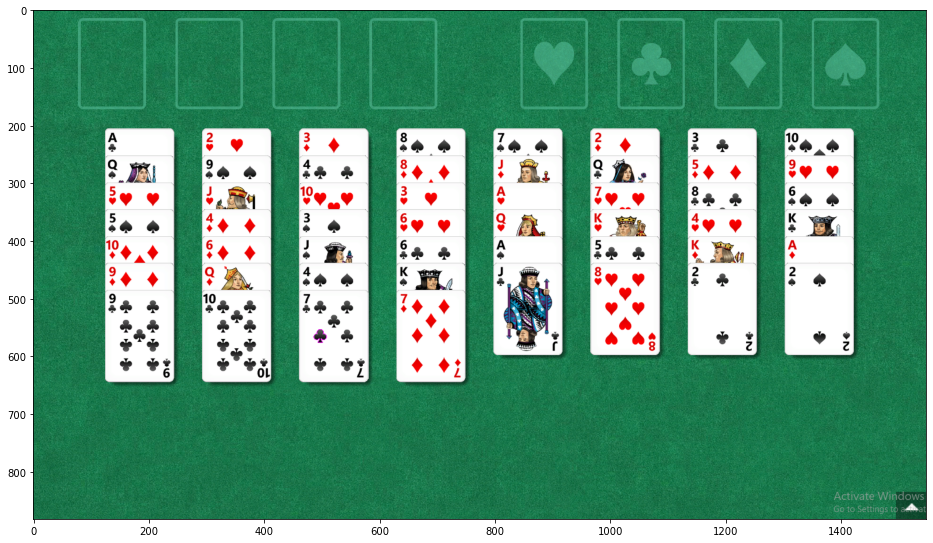

In [103]:
#konture za otsu  (najbolji, samo uopste ne vidi polja gore)
contours, hierarchy = cv2.findContours(image_otsu, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

img = img_rgb.copy()
cv2.drawContours(img, contours, 52, (255, 0, 255), 1)
plt.imshow(img)



In [104]:
print(len(contours))

698


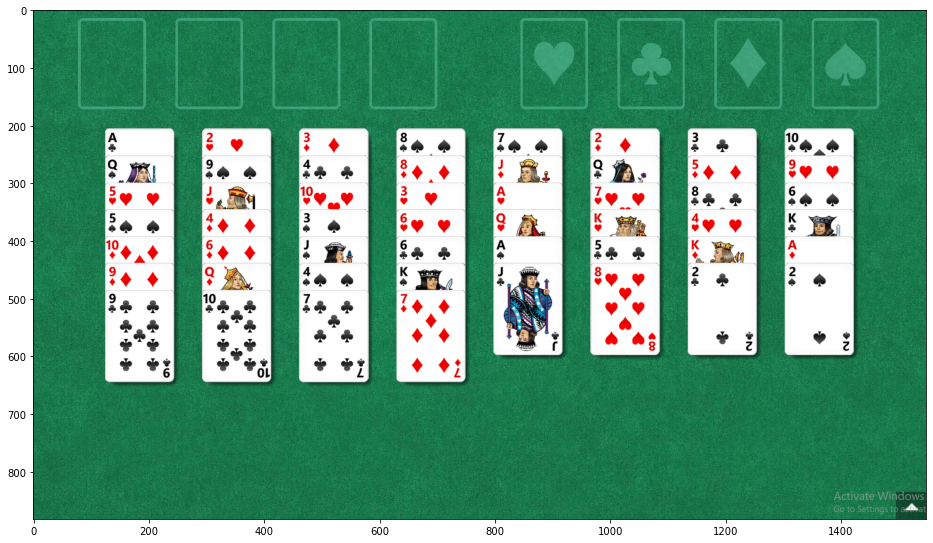

In [107]:
#izdvajanje kontura iz otsua
#NE RADI
contours_cards = [] #ovde ce biti samo konture koje pripadaju bar-kodu
for contour in contours: # za svaku konturu
    center, size, angle = cv2.minAreaRect(contour) # pronadji pravougaonik minimalne povrsine koji ce obuhvatiti celu konturu
    width, height = size
    if width > 50 and width < 100 and height > 50 and height < 100: # uslov da kontura pripada bar-kodu
        contours_cards.append(contour) # ova kontura pripada bar-kodu

img = img_rgb.copy()
cv2.drawContours(img, contours_cards, -1, (255, 0, 255), 1)
plt.imshow(img)